## Especificações para projeto de compensadores SISO

In [1]:
import matplotlib.pyplot as plt
%matplotlib widget

import numpy as np
import control as ct

In [2]:
# Paleta de cores
cp = {
    'red': (1.0, 0.349, 0.369, 1.0),
    'green': (0.541, 0.788, 0.149, 1.0),
    'blue': (0.098, 0.510, 0.769, 1.0),
    'lred': (1.0, 0.588, 0.6, 1.0),
    'lgreen': (0.722, 0.894, 0.443, 1.0),
    'lblue': (0.369, 0.706, 0.918, 1.0),
    'orange': (1.0, 0.506, 0.227, 1.0),
    'yellow': (1.0, 0.792, 0.227, 1.0),
    'pink': (1.0, 0.349, 0.611, 1.0),
    'purple': (0.416, 0.298, 0.576, 1.0),
    'turquoise': (0.098, 0.761, 0.769, 1.0),
    'brown': (0.576, 0.380, 0.298, 1.0)
}

### 1. Especificações de polos dominantes para projeto via lugar das raízes

#### 1.1. Aproximação por sistema de primeira ordem em malha fechada

Caso o *sistema em malha fechada* possua um único polo dominante localizado em $\bar p_1 = \displaystyle - \frac{1}{\tau}$, seu comportamento pode ser aproximado por uma função de transferência equivalente de *primeira ordem*:
$$
T(s) \approx \frac{1}{1 + \tau s}
$$
em que $\tau$ é a *constante de tempo*. 

Em termos de resposta a degrau, $5 \tau$ deve ser o tempo necessário para que a resposta $y(t)$ se aproxime com erro inferior a 1% da referência escolhida.

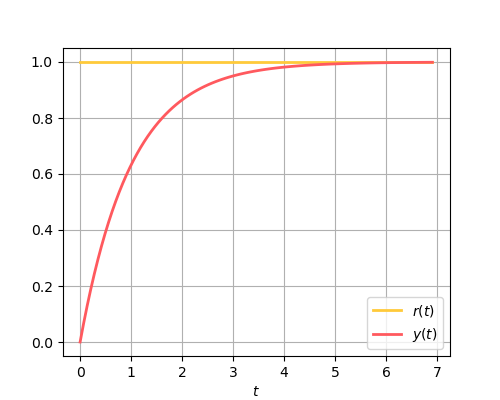

In [3]:
T_1 = ct.tf([1], [1, 1])
t_1, y_1 = ct.step_response(T_1)

fig, (state) = plt.subplots(
    1, 1, figsize=(5, 4), sharex=True)

state.plot(t_1, np.ones(len(t_1)), color=cp['yellow'], label=r'$r(t)$', linewidth=2)
# state.plot(t, y_PI, color=cp['green'], label='PI', linewidth=2)
state.plot(t_1, y_1, color=cp['red'], label=r'$y(t)$', linewidth=2)
state.set_xlabel(r'$t$')
state.legend()
state.grid()

#### 1.2. Aproximação por sistema de segunda ordem em malha fechada

Caso o *sistema em malha fechada* possua apenas um par de polos complexos conjugados dominantes
$
\bar p_{1,2} = - \sigma \pm \mathsf{j} \omega
$, 
seu comportamento *em malha fechada* pode ser aproximado por uma função de transferência equivalente de *segunda ordem*:
$$
T(s) \approx \frac{\omega_n^2}{s^2 + 2 \zeta \omega_n s + \omega_n^2}
$$
em que $\omega_n = \displaystyle \sqrt{\sigma^2 + \omega^2}$ é a *frequência natural* (não-amortecida) e $\zeta = \displaystyle \frac{\sigma}{\omega_n}$ é a *razão de amortecimento*.

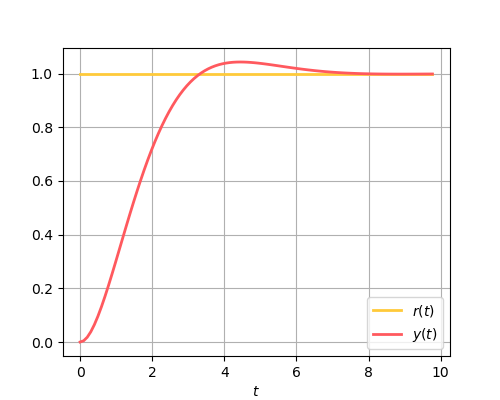

In [4]:
T_2 = ct.tf([1], [1, np.sqrt(2), 1])
t_2, y_2 = ct.step_response(T_2)

fig, (state) = plt.subplots(
    1, 1, figsize=(5, 4), sharex=True)

state.plot(t_2, np.ones(len(t_2)),
           color=cp['yellow'], label=r'$r(t)$', linewidth=2)
# state.plot(t, y_PI, color=cp['green'], label='PI', linewidth=2)
state.plot(t_2, y_2, color=cp['red'], label=r'$y(t)$', linewidth=2)
state.set_xlabel(r'$t$')
state.legend()
state.grid()

A resposta de um sistema de segunda ordem a uma referência degrau pode ser caracterizada por:

**(a) tempo de subida ($t_r$)** – tempo requerido para que a resposta a um degrau unitário suba de $y = 0.1$ a $y = 0.9$:
$$
t_r \approx \frac{1 + 1.1 \zeta + 1.4 \zeta^2}{\omega_n}
$$

Para um sistema linear em geral (não necessariamente de segunda ordem), o tempo de subida (*rise time*) é inversamente proprocional à largura de banda (*bandwidth*).

**(b) tempo de acomodação ($t_s$)** – tempo requerido para que a resposta a um degrau unitário atinja e permaneça em um intervalo $1 - f < y < 1 + f$ com $f$ sendo uma fração, cujos valores típicos são $f = 0.05$ (5%) ou $f = 0.02$ (2%).
$$
    t_s = - \frac{1}{\zeta \omega_n} \ln \left(f \sqrt{1-\zeta^2} \right)
$$

Em particular, para $\zeta \ll 1$ e $f = 0.02$, uma boa aproximação consiste em tomar:
$$
t_s \approx \frac{4}{\zeta \omega_n}
$$


**(c) tempo de pico ($t_p$)** – tempo necessário para que a resposta a um degrau unitário atinja seu valor máximo.
$$
    t_p = \frac{\pi}{\omega_n \sqrt{1 - \zeta^2}}
$$

**(d) sobressinal ou *overshoot* ($M_p$)** – quanto o valor máximo observado para a saída excede o degrau unitário
$$
    M_p = y(t_p) - 1 = \exp \left( {\frac{-\zeta \pi}{\sqrt{1 - \zeta^2}}} \right)
$$

A partir desta equação, podemos expressar a *razão de amortecimento* como:
$$
    \zeta = \frac{-\ln \left( M_{p} \right)}{\sqrt{\pi^2 + \ln^2 \left( M_{p} \right)}}
$$

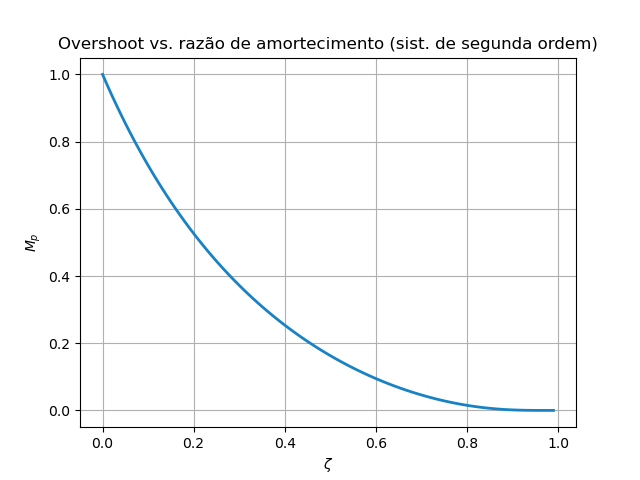

In [5]:
plt.figure()
ζ = np.linspace(0, 0.99, 100)
M_p = np.exp(-ζ * np.pi/np.sqrt(1 - ζ**2))
plt.plot(ζ, M_p, color=cp['blue'], linewidth=2)
plt.xlabel(r'$\zeta$')
plt.ylabel(r'$M_p$')
plt.title('Overshoot vs. razão de amortecimento (sist. de segunda ordem)')
plt.grid()

Retornando à função de transferência do tipo $m=1$ do exemplo A-6-19 do livro: 
> OGATA, K. (2001) Modern Control Engineering, 4th ed., Pearson.

que visa representar um *piloto automático para o modo longitudinal (pitch) de um avião*:

\begin{align*}
    L(s) = G(s)H(s) = \frac{K(s+a)}{s(s-b)(s^2 + 2\zeta \omega_n s + \omega_n^2)} = K \frac{N(s)}{D(s)}
\end{align*}

Adotando $a=b=1$, $\zeta=0.5$ e $\omega_n=4$:

\begin{align*}
   L(s) = \frac{K(s+1)}{s(s-1)(s^2 + 4s + 16)}
\end{align*}

tem-se um zero em $z_1 = -1$ e quatro polos em $p_0=0$ (multiplicidade algébrica 1), $p_1=+1$ e $p_{2,3}=-2 \pm 2\sqrt{3} \mathsf{j}$.

Vimos que, nestas condições, a planta é *condicionalmente estável*, ou seja, é possível ter um comportamento estável em malha fechada com controlador *proporcional* ($K$) se, e somente se: $$23.32 < K < 35.68$$

In [6]:
zeros = np.array([-1])
poles = np.array([0, +1, -2 + (2j * np.sqrt(3)), -2 - (2j * np.sqrt(3))])

N = ct.tf(np.poly(zeros), [1])
D = ct.tf(np.poly(poles), [1])

L_0 = N/D
L_0

TransferFunction(array([1., 1.]), array([  1.,   3.,  12., -16.,   0.]))

Também projetamos para este sistema, via *método do lugar das raízes* um compensador PID:
$$
G_c(s) = K_c \left( 1+ \frac{1}{\tau_i s} + \tau_d s \right)
$$
com: $\tau_i = 12$ s, $\tau_d = 3.6667$ s e $K_c = 15$. 

In [7]:
τ_i = 12.0
τ_d = 3.6667
G_c_PID = 15 * ct.tf([τ_d, 1, 1/τ_i], [1, 0])
G_c_PID

TransferFunction(array([55.0005, 15.    ,  1.25  ]), array([1, 0]))

Verifiquemos então a resposta a degrau do sistema em malha fechada considerando a introdução do compensador PID no canal direto:

In [8]:
# Malha aberta
L_c = G_c_PID * L_0
L_c

TransferFunction(array([55.0005, 70.0005, 16.25  ,  1.25  ]), array([  1.,   3.,  12., -16.,   0.,   0.]))

In [9]:
# Malha fechada
T_c = ct.feedback(L_c)
T_c

TransferFunction(array([55.0005, 70.0005, 16.25  ,  1.25  ]), array([ 1.    ,  3.    , 67.0005, 54.0005, 16.25  ,  1.25  ]))

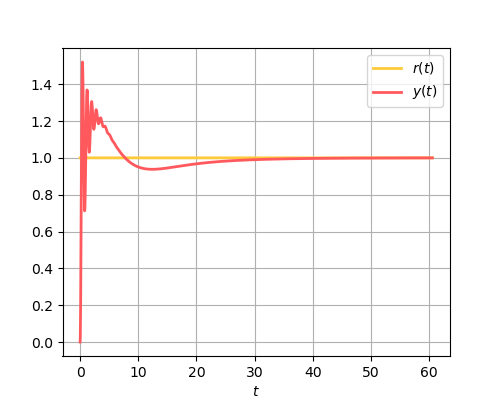

In [10]:
t_c, y_c = ct.step_response(T_c)

fig, (state) = plt.subplots(
    1, 1, figsize=(5, 4), sharex=True)

state.plot(t_c, np.ones(len(t_c)),
           color=cp['yellow'], label=r'$r(t)$', linewidth=2)
# state.plot(t, y_PI, color=cp['green'], label='PI', linewidth=2)
state.plot(t_c, y_c, color=cp['red'], label=r'$y(t)$', linewidth=2)
state.set_xlabel(r'$t$')
state.legend()
state.grid()

O uso da função `control.step_info` nos auxilia a caracterizar a resposta a degrau do sistema em malha fechada:

In [11]:
ct.step_info(T_c)

{'RiseTime': 0.1559025751973128,
 'SettlingTime': 24.00899658038617,
 'SettlingMin': 0.7120487332317941,
 'SettlingMax': 1.5204477603284947,
 'Overshoot': 52.04477603284947,
 'Undershoot': 0,
 'Peak': 1.5204477603284947,
 'PeakTime': 0.4053466955130133,
 'SteadyStateValue': 1.0}

### 2. Especificações de margem de estabilidade para projeto via diagrama de Bode

#### 2.1. Compensador de avanço de fase
$$
G_c(s) = \frac{1 + \tau_c s}{1 + \alpha \tau_c s} = \frac{1}{\alpha} \frac{s + \frac{1}{\tau_c}}{s + \frac{1}{\alpha \tau_c}}, \quad 0 < \alpha < 1
$$

Passo-a-passo do projeto:

**PASSO 1 –** determinar a margem de fase do sistema não-compensado

Voltando ao exemplo, consideremos como sistema não-compensando a função de transferência de malha aberta original com ganho proporcional $K = 32$, o que garante um $\displaystyle K_1 = \lim_{s \to 0} s L(s) = -2$.

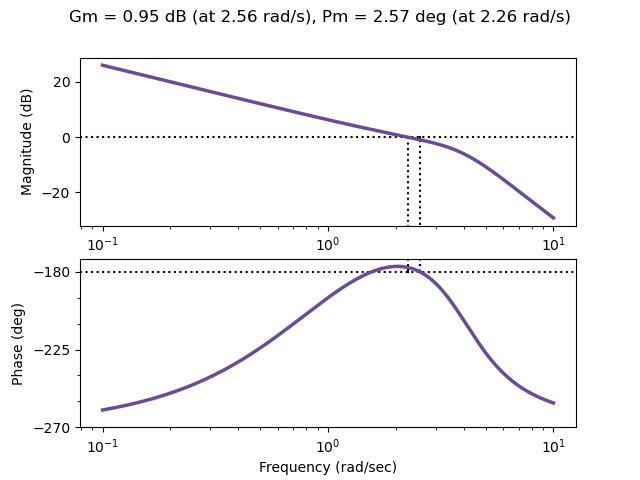

In [12]:
plt.figure()
mag, phase, omega = ct.bode_plot(
    32 * L_0, color=cp['purple'], linewidth=2.5, dB=True, margins=True, omega_limits=(1e-1, 10), initial_phase=-270)

**PASSO 2 –** Determine a fase $\phi_m$ a ser avançada, admitindo uma margem de segurança (tipicamente $+5^\circ$) e calcule o respectivo valor de $\alpha$.

No caso, admitamos um avanço de fase $\phi_m = 55^\circ$.

$$ \phi_m = \arcsin\left(\frac{1-\alpha}{1+\alpha} \right)
\quad \text{em} \quad
\omega_m \tau_c = \frac{1}{\sqrt{\alpha}} 
\quad \Rightarrow \quad 
\alpha = \frac{1 + \sin \phi_m}{1 - \sin \phi_m}
$$

In [13]:
φ_m = 55 * np.pi/180
α = (1 - np.sin(φ_m))/(1 + np.sin(φ_m))
α

0.09941332626855381

**PASSO 3 –** Determine a frequência $ω_m$ no gráfico do sistema não-compensado, onde se observa uma magnitude de $\sqrt{\alpha}$ (ou $- 10 |\log_{10} \alpha| \ \text{dB}$).

In [14]:
(np.sqrt(α), 10*np.log10(α))

(0.3152987888789835, -10.025553949087868)

In [15]:
# obtendo o valor de ω_m por interpolação linear
i_m = np.where((mag[:-1] > np.sqrt(α)) & (mag[1:] < np.sqrt(α)))[0][0]
ω_m = omega[i_m] + (np.sqrt(α) - mag[i_m]) * (omega[i_m+1] - omega[i_m]) / (mag[i_m+1] - mag[i_m])
ω_m

4.860292686423012

**PASSO 4 –** Calcule $\tau_c$ e conclua o projeto do compensador.

In [16]:
τ_c = 1/(ω_m * np.sqrt(α))
τ_c

0.6525522241125327

##### ANÁLISE DO COMPENSADOR PROJETADO

Substituindo os valores obtidos para $\alpha$ e $\tau_c$ a seguinte expressão para o compensador de avanço de fase $G_c(s)$:

In [17]:
G_c_lead = ct.tf([τ_c, 1], [α * τ_c, 1])
G_c_lead

TransferFunction(array([0.65255222, 1.        ]), array([0.06487239, 1.        ]))

Abaixo, o diagrama de Bode de $G_c(s)$:

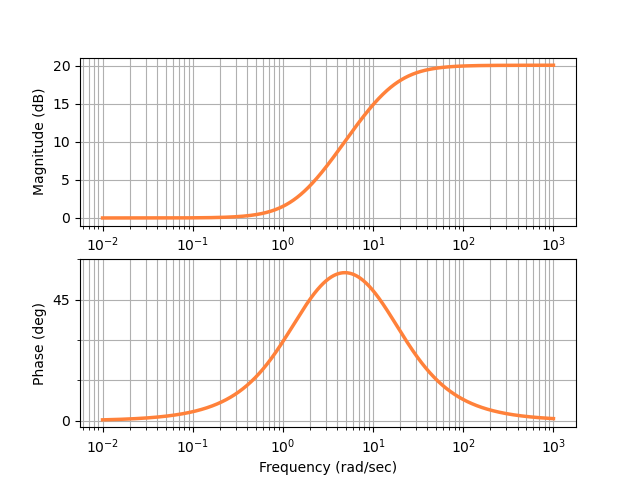

In [18]:
plt.figure()
mag_lead, phase_lead, omega_lead = ct.bode_plot(
    [G_c_lead], color=cp['orange'], linewidth=2.5, dB=True, omega_limits=(1e-2, 1000), initial_phase=0)

Considerando a presença do compensador, a nova função de transferência de malha aberta se torna:

In [19]:
L_1 = 32 * G_c_lead * L_0
L_1

TransferFunction(array([20.88167117, 52.88167117, 32.        ]), array([  0.06487239,   1.19461716,   3.77846865,  10.96204181,
       -16.        ,   0.        ]))

A partir do diagrama de Bode, verificamos os novos valores obtidos para margem de ganho e margem de fase:

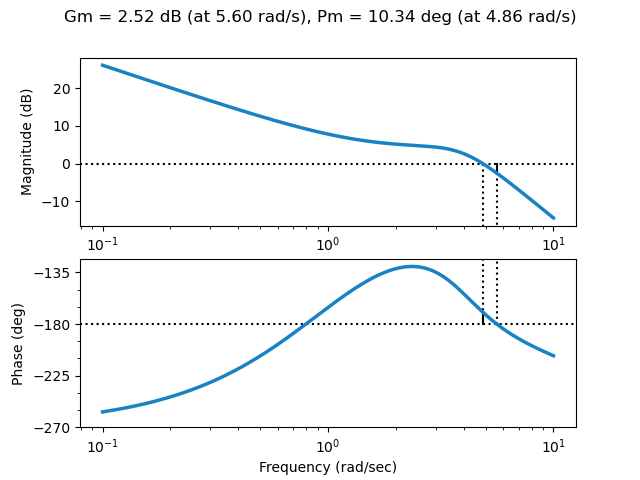

In [20]:
plt.figure()
mag_1, phase_1, omega_1 = ct.bode_plot(
    L_1, color=cp['blue'], linewidth=2.5, dB=True, margins=True, omega_limits=(1e-1, 10), initial_phase=-270)

Abaixo analisamos a função de trasnferência em malha fechada $T_1(s)$, por meio de seu diagrama de Bode, largura de banda e resposta a degrau:

In [21]:
T_1 = ct.feedback(L_1)
T_1

TransferFunction(array([20.88167117, 52.88167117, 32.        ]), array([ 0.06487239,  1.19461716,  3.77846865, 31.84371298, 36.88167117,
       32.        ]))

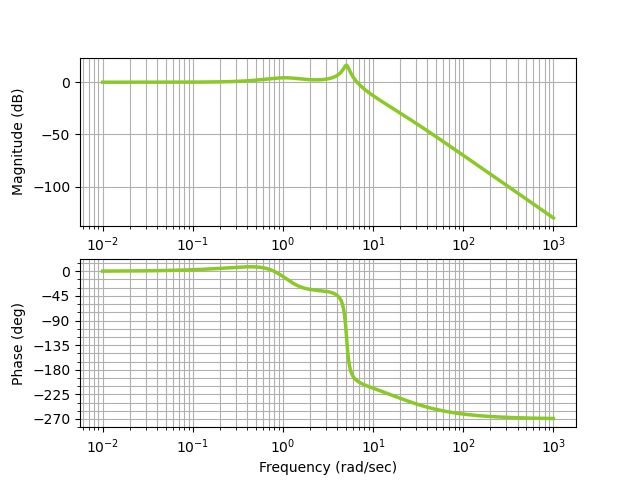

In [22]:
# diagrama de Bode
plt.figure()
mag_T1, phase_T1, omega_T1 = ct.bode_plot(
    [T_1], color=cp['green'], linewidth=2.5, dB=True, omega_limits=(1e-2, 1000), initial_phase=0)

In [23]:
# largura de banda
T_1.bandwidth()

7.181258019059842

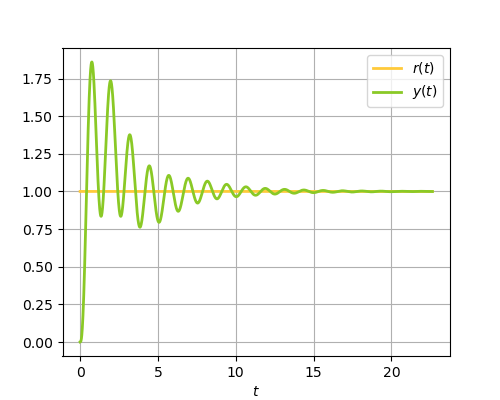

In [24]:
# reposta a degrau
t_c, y_c = ct.step_response(T_1)

fig, (state) = plt.subplots(
    1, 1, figsize=(5, 4), sharex=True)

state.plot(t_c, np.ones(len(t_c)),
           color=cp['yellow'], label=r'$r(t)$', linewidth=2)
# state.plot(t, y_PI, color=cp['green'], label='PI', linewidth=2)
state.plot(t_c, y_c, color=cp['green'], label=r'$y(t)$', linewidth=2)
state.set_xlabel(r'$t$')
state.legend()
state.grid()

In [25]:
ct.step_info(T_1)

{'RiseTime': 0.24171723072686807,
 'SettlingTime': 11.927495074832699,
 'SettlingMin': 0.7621098429710039,
 'SettlingMax': 1.8597486415313942,
 'Overshoot': 85.97486415313942,
 'Undershoot': 0,
 'Peak': 1.8597486415313942,
 'PeakTime': 0.7501569229454528,
 'SteadyStateValue': 1.0}

Podemos também avaliar a respectiva função de transferência de sensibilidade $S_1(s) = 1 - T_1(s)$:

In [26]:
S_1 = 1 - T_1
S_1

TransferFunction(array([  0.06487239,   1.19461716,   3.77846865,  10.96204181,
       -16.        ,   0.        ]), array([ 0.06487239,  1.19461716,  3.77846865, 31.84371298, 36.88167117,
       32.        ]))

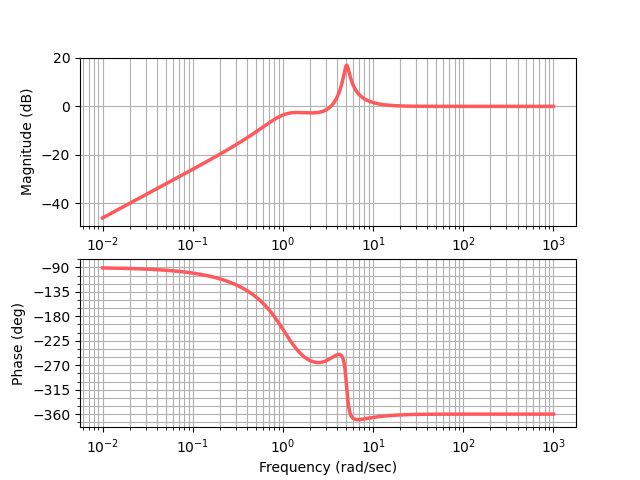

In [27]:
# diagrama de Bode
plt.figure()
mag_S1, phase_S1, omega_S1 = ct.bode_plot(
    [S_1], color=cp['red'], linewidth=2.5, dB=True, omega_limits=(1e-2, 1000), initial_phase=0)

#### 2.2. Compensador de atraso de fase

$$ G_g(s) = \frac{1 + \tau_g s}{1 + \beta \tau_g s} = \frac{1}{\beta} \frac{s + \frac{1}{\tau_g}}{s + \frac{1}{\beta \tau_g}}, 
\quad \beta >1
$$

Para o exemplo anterior observamos que a margem de fase ainda é pequena, pois o valor de $\omega_c$ está acima da faixa de frequências em que se observa o maior valor de $180^\circ + \phase{L_1(\mathsf{j} \omega)}$. O compensador de atraso neste caso, vai atuar reduzindo o valor de $\omega_c$, com o objetivo de colocá-lo nesta faixa de frequências, o que maximizaria o valor da margem de fase $\text{PM} = 180^\circ + \phase{L_1(\mathsf{j} \omega_c)}$.

**PASSO 1 –** Avaliar o diagrama de Bode da malha aberta ainda sem compensador de atraso:

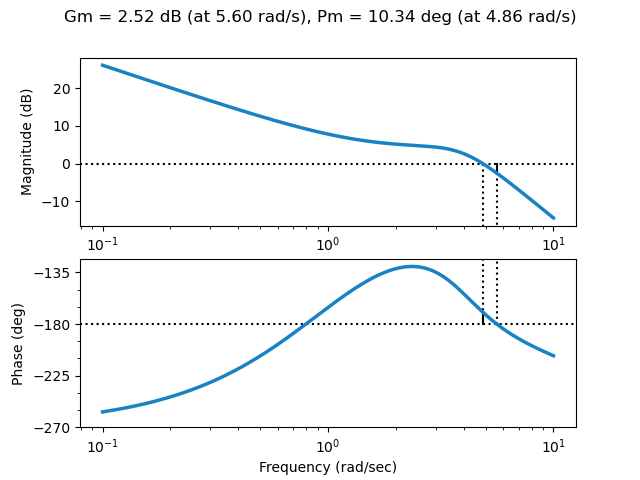

In [28]:
plt.figure()
mag_1, phase_1, omega_1 = ct.bode_plot(
    L_1, color=cp['blue'], linewidth=2.5, dB=True, margins=True, omega_limits=(1e-1, 10), initial_phase=-270)

**PASSO 2 –** A partir da margem de fase desejada, admitindo uma margem de segurança (tipicamente $+5^\circ$), encontre o valor da nova frequência de corte.

Para o exemplo, admitamos que seja desejável uma margem de fase $\text{PM} = 45^\circ + 5^\circ = 50^\circ$.

In [29]:
# obtendo o valor de ω_c por interpolação linear
i_c = np.where((phase_1[:-1] > (-1 + 50/180)*np.pi) & (phase_1[1:] < (-1 + 50/180)*np.pi))[0][0]
ω_c = omega_1[i_c] + ((-1 + 50/180)*np.pi - phase_1[i_c]) * (omega_1[i_c+1] - omega_1[i_c]) / (phase_1[i_c+1] - phase_1[i_c])
ω_c

2.4866866541213115

**PASSO 3 –** Obter $\tau_g$ considerando que o zero do compensador esteja, em módulo, uma década abaixo de $\omega_c$, ou seja:
$$\frac{1}{\tau_g} = 0.1 \omega_c$$

In [30]:
τ_g = 1 / (0.1 * ω_c)
τ_g

4.021415397644288

**PASSO 4 –** Obter $\beta$ considerando que na freqûencia de corte $\omega_c$, $|G_g(\omega_c) L_1(\omega_c)| = 1$, ou seja:
$$\left|\frac{1}{\beta} L_1(\mathsf{j} \omega_c) \right| = 1
\quad \Rightarrow \quad \beta = | L_1(\mathsf{j} \omega_c)|
\quad \text{($20 \log_{10} \beta = 20 \log_{10} | L_1(\mathsf{j} \omega_c)|$)}
$$

In [31]:
β = mag_1[i_c]
β

1.7329357994898436

##### ANÁLISE DO COMPENSADOR PROJETADO

Considerando os valores de $\beta$ e $\tau_g$ calculados, obtém-se o seguinte compensador de atraso $G_g(s)$:

In [32]:
G_g = ct.tf([τ_g, 1], [β * τ_g, 1])
G_g

TransferFunction(array([4.0214154, 1.       ]), array([6.96885471, 1.        ]))

Abaixo, o diagrama de Bode de $G_g(s)$:

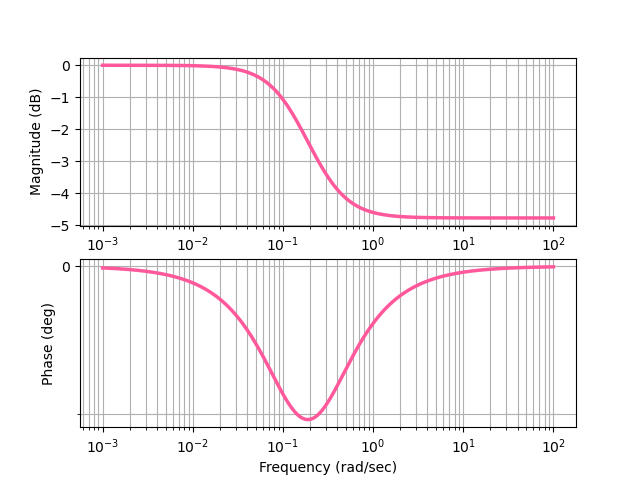

In [33]:
plt.figure()
mag_lead, phase_lead, omega_lead = ct.bode_plot(
    [G_g], color=cp['pink'], linewidth=2.5, dB=True, omega_limits=(1e-3, 100), initial_phase=0)

A nova função de transferência de malha aberta $L_2(s)$, considerando agora a associação de ambos os compensadores projetados, se torna:

In [34]:
L_2 = G_g * L_1
L_2

TransferFunction(array([ 83.97387398, 233.54083787, 181.5669639 ,  32.        ]), array([   0.45208624,    8.38998582,   27.52621617,   80.17134528,
       -100.53963351,  -16.        ,    0.        ]))

Abaixo, o diagrama de Bode de $L_2(s)$, mostrando as margens de ganho e de fase obtidas ao final do projeto:

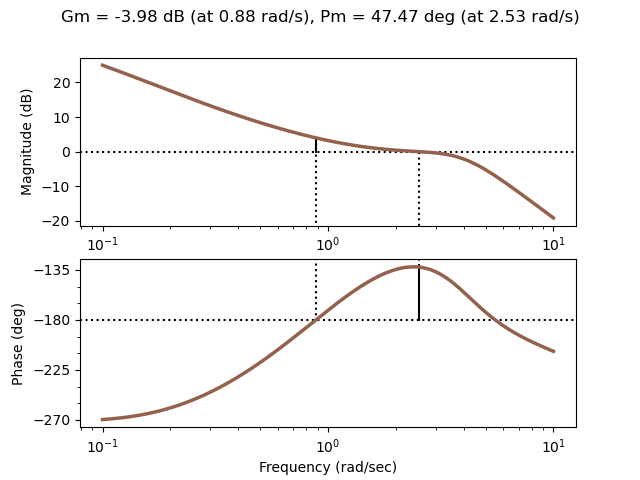

In [35]:
plt.figure()
mag_2, phase_2, omega_2 = ct.bode_plot(
    L_2, color=cp['brown'], linewidth=2.5, dB=True, margins=True, omega_limits=(1e-1, 10), initial_phase=-270)

Abaixo analisamos a função de trasnferência em malha fechada $T_2(s)$, por meio de seu diagrama de Bode, largura de banda e resposta a degrau:

In [36]:
T_2 = ct.feedback(L_2)
T_2

TransferFunction(array([ 83.97387398, 233.54083787, 181.5669639 ,  32.        ]), array([  0.45208624,   8.38998582,  27.52621617, 164.14521926,
       133.00120436, 165.5669639 ,  32.        ]))

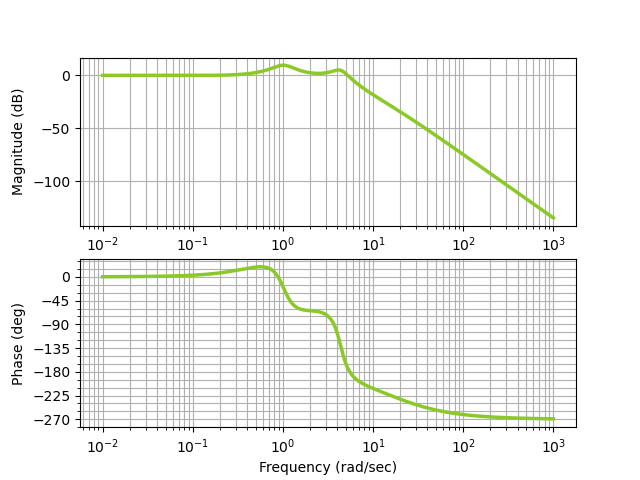

In [37]:
# diagrama de Bode
plt.figure()
mag_T2, phase_T2, omega_T2 = ct.bode_plot(
    [T_2], color=cp['green'], linewidth=2.5, dB=True, omega_limits=(1e-2, 1000), initial_phase=0)

In [38]:
# largura de banda
T_2.bandwidth()

5.709063584002731

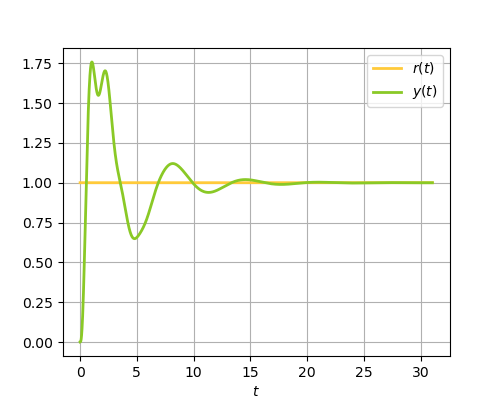

In [39]:
# reposta a degrau
t_c, y_c = ct.step_response(T_2)

fig, (state) = plt.subplots(
    1, 1, figsize=(5, 4), sharex=True)

state.plot(t_c, np.ones(len(t_c)),
           color=cp['yellow'], label=r'$r(t)$', linewidth=2)
# state.plot(t, y_PI, color=cp['green'], label='PI', linewidth=2)
state.plot(t_c, y_c, color=cp['green'], label=r'$y(t)$', linewidth=2)
state.set_xlabel(r'$t$')
state.legend()
state.grid()

In [40]:
ct.step_info(T_2)

{'RiseTime': 0.32580139837344535,
 'SettlingTime': 12.800565467672472,
 'SettlingMin': 0.6485863061594674,
 'SettlingMax': 1.7576703284347084,
 'Overshoot': 75.76703284347084,
 'Undershoot': 0,
 'Peak': 1.7576703284347084,
 'PeakTime': 1.0374202421891288,
 'SteadyStateValue': 1.0}

Finalmente, para a função de sensibilidade $S_2(s) = 1 - T_2(s)$:

In [41]:
S_2 = 1 - T_2
S_2

TransferFunction(array([   0.45208624,    8.38998582,   27.52621617,   80.17134528,
       -100.53963351,  -16.        ,    0.        ]), array([  0.45208624,   8.38998582,  27.52621617, 164.14521926,
       133.00120436, 165.5669639 ,  32.        ]))

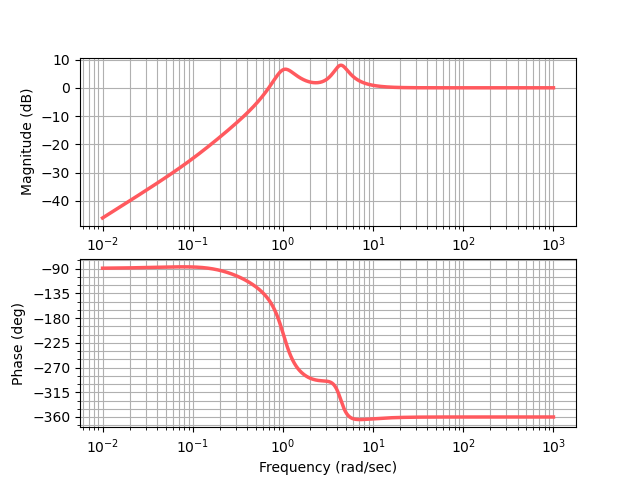

In [42]:
# diagrama de Bode
plt.figure()
mag_S2, phase_S2, omega_S2 = ct.bode_plot(
    [S_2], color=cp['red'], linewidth=2.5, dB=True, omega_limits=(1e-2, 1000), initial_phase=0)